# Hackathon

### Problem Statement :-
Credit card consumption patterns are a gold mine for banks and financial companies. The consumption patterns and spends of a customer allow banks to build strategic partnerships with vendors for discounts or other plans to reward and retain customers. Further, banks can understand from the spending patterns and profile people based on spending and tailor the loans or financial products based on those.

Thus it is important to understand the relationship between the customer profile and their spending patterns. The Common Man Bank Ltd (CMB) wants to understand these patterns thoroughly and get insights on the customer persona and the spending patterns. So from their database, they have prepared the data of sample customers and their transaction history. As a data scientist working with CMB, you are now supposed to mine insights from the data.

CMB Bank has given customer details, like age, gender and other demographics. Also shared are information on liabilities, assets and history of transactions with the bank for each customer. In addition to the above, data has been provided for a particular set of customers' credit card spend in the previous 3 months (April, May & June) and their expected average spend in the coming 3 months (July, August & September). Predict the average spend for a different set of customers in the test set for the coming 3 months.

### About Dataset :-
|Features|Description|
|-----|-----|
|id|Unique ID for every Customer|
|account_type|Account Type – current or saving|
|gender|Gender of customer|
|age|Age of customer|
|region_code|Code assigned to region of residence (has order)|
|cc_cons_apr|Credit card spend in April|
|dc_cons_apr|Debit card spend in April|
|cc_cons_may|Credit card spend in May|
|dc_cons_may|Debit card spend in May|
|cc_cons_jun|Credit card spend in June|
|dc_cons_jun|Debit card spend in June|
|cc_count_apr|Number of credit card transactions in April|
|cc_count_may|Number of credit card transactions in May|
|cc_count_jun|Number of credit card transactions in June|
|dc_count_apr|Number of debit card transactions in April|
|dc_count_may|Number of debit card transactions in May|
|dc_count_jun|Number of debit card transactions in June|
|card_lim|Maximum Credit Card Limit allocated|
|personal_loan_active|Active personal loan with other bank|
|vehicle_loan_active|Active Vehicle loan with other bank|
|personal_loan_closed|Closed personal loan in last 12 months|
|vehicle_loan_closed|Closed vehicle loan in last 12 months|
|investment_1|DEMAT investment in june|
|investment_2|fixed deposit investment in june|
|investment_3|Life Insurance investment in June|
|investment_4|General Insurance Investment in June|
|debit_amount_apr|Total amount debited for April|
|credit_amount_apr|Total amount credited for April|
|debit_count_apr|Total number of times amount debited in april|
|credit_count_apr|Total number of times amount credited in april|
|max_credit_amount_apr|Maximum amount credited in April|
|debit_amount_may|Total amount debited for May|
|credit_amount_may|Total amount credited for May|
|credit_count_may|Total number of times amount credited in May|
|debit_count_may|Total number of times amount debited in May|
|max_credit_amount_may|Maximum amount credited in May|
|debit_amount_jun|Total amount debited for June|
|credit_amount_jun|Total amount credited for June|
|credit_count_jun|Total number of times amount credited in June|
|debit_count_jun|Total number of times amount debited in June|
|max_credit_amount_jun|Maximum amount credited in June|
|loan_enq|Loan enquiry in last 3 months|
|emi_active|Monthly EMI paid to other bank for active loans|
|cc_cons|(Target) Average Credit Card Spend in next three months!|


In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style # for styling the graphs
# style.available (to know the available list of styles)
style.use('ggplot') # chosen style
plt.rc('xtick',labelsize=13) # to globally set the tick size
plt.rc('ytick',labelsize=13) # to globally set the tick size
# To print multiple outputs together
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# Change column display number during print
pd.set_option('display.max_columns', 500)
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')
# To display float with 2 decimal, avoid scientific printing
pd.options.display.float_format = '{:.2f}'.format
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor ,RandomForestRegressor
from xgboost import XGBRegressor 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import mean_squared_error,accuracy_score,mean_squared_log_error,r2_score
from scipy.stats.mstats import winsorize
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns',None)
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier

In [4]:
df = pd.read_csv('./Train.csv')
df.head()

,ID,account_type,gender,age,region_code,dc_cons_apr,dc_cons_may,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,cc_cons
0,12554,saving,F,36,336.00,10740.54,26271.58,12332.39,4.00,6.00,12.00,1.00,1.00,3.00,248145.00,nan,nan,nan,nan,nan,nan,nan,nan,73179.47,637691.33,0.00,2.00,471134.27,436171.36,733348.56,2.00,1.00,110403.21,1114847.37,686870.60,2.00,1.00,161824.47,NaN,1946.00
1,17645,current,M,24,529.00,15400.27,16346.51,13308.84,14.00,10.00,31.00,7.00,5.00,11.00,24005.00,nan,nan,nan,nan,nan,nan,nan,nan,405375.60,182564.04,20.00,4.00,424970.39,629510.47,140978.45,2.00,17.00,336653.55,401066.63,236839.53,10.00,31.00,530033.85,NaN,66784.00
2,7604,current,M,34,541.00,nan,16616.79,8165.06,19.00,8.00,23.00,nan,9.00,8.00,55953.00,nan,nan,nan,nan,nan,nan,nan,nan,422194.83,435950.01,28.00,3.00,120890.57,616448.41,370850.54,4.00,22.00,359000.88,894453.37,1896231.10,5.00,24.00,481495.65,Y,14469.00
3,1590,current,M,39,523.00,15962.46,17848.55,28502.69,nan,1.00,17.00,3.00,5.00,16.00,406984.00,nan,nan,nan,1.00,nan,nan,nan,nan,33573.88,540109.58,43.00,5.00,435724.52,280011.28,260148.10,6.00,39.00,217724.54,1772800.59,1276361.80,7.00,37.00,536714.94,NaN,6494.00
4,16556,current,M,28,239.00,nan,35662.00,13474.22,23.00,14.00,32.00,nan,5.00,14.00,34545.00,nan,nan,nan,nan,nan,nan,nan,nan,161189.08,306331.27,5.00,5.00,279918.41,206119.37,395626.13,4.00,15.00,519029.31,852574.01,611058.04,3.00,26.00,349316.59,NaN,14588.00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 40 columns):
ID                       15000 non-null int64
account_type             15000 non-null object
gender                   15000 non-null object
age                      15000 non-null int64
region_code              15000 non-null float64
dc_cons_apr              6387 non-null float64
dc_cons_may              7153 non-null float64
dc_cons_jun              5334 non-null float64
cc_count_apr             13915 non-null float64
cc_count_may             14470 non-null float64
cc_count_jun             14256 non-null float64
dc_count_apr             6387 non-null float64
dc_count_may             7153 non-null float64
dc_count_jun             7890 non-null float64
card_lim                 14991 non-null float64
personal_loan_active     1259 non-null float64
vehicle_loan_active      389 non-null float64
personal_loan_closed     1253 non-null float64
vehicle_loan_closed      711 non-null float

In [6]:
df.isnull().sum() / df.shape[0]

ID                      0.00
account_type            0.00
gender                  0.00
age                     0.00
region_code             0.00
dc_cons_apr             0.57
dc_cons_may             0.52
dc_cons_jun             0.64
cc_count_apr            0.07
cc_count_may            0.04
cc_count_jun            0.05
dc_count_apr            0.57
dc_count_may            0.52
dc_count_jun            0.47
card_lim                0.00
personal_loan_active    0.92
vehicle_loan_active     0.97
personal_loan_closed    0.92
vehicle_loan_closed     0.95
investment_1            0.96
investment_2            0.93
investment_3            0.96
investment_4            0.99
debit_amount_apr        0.04
credit_amount_apr       0.10
debit_count_apr         0.05
credit_count_apr        0.05
max_credit_amount_apr   0.10
debit_amount_may        0.07
credit_amount_may       0.10
credit_count_may        0.06
debit_count_may         0.06
max_credit_amount_may   0.10
debit_amount_jun        0.06
credit_amount_

In [11]:
# Adaptive binning on 'Age' using quantiles
quantile_list = [0, .25, .5, .75, 1.]
quantiles = df['age'].quantile(quantile_list)
quantile_labels = ['22-30', '31-34', '35-39', '> 40']
df['age_group'] = pd.qcut(df['age'], q=quantile_list, labels=quantile_labels)
df

,ID,account_type,gender,age,region_code,dc_cons_apr,dc_cons_may,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,cc_cons,age_group
0,12554,saving,F,36,336.00,10740.54,26271.58,12332.39,4.00,6.00,12.00,1.00,1.00,3.00,248145.00,nan,nan,nan,nan,nan,nan,nan,nan,73179.47,637691.33,0.00,2.00,471134.27,436171.36,733348.56,2.00,1.00,110403.21,1114847.37,686870.60,2.00,1.00,161824.47,NaN,1946.00,35-39
1,17645,current,M,24,529.00,15400.27,16346.51,13308.84,14.00,10.00,31.00,7.00,5.00,11.00,24005.00,nan,nan,nan,nan,nan,nan,nan,nan,405375.60,182564.04,20.00,4.00,424970.39,629510.47,140978.45,2.00,17.00,336653.55,401066.63,236839.53,10.00,31.00,530033.85,NaN,66784.00,22-30
2,7604,current,M,34,541.00,nan,16616.79,8165.06,19.00,8.00,23.00,nan,9.00,8.00,55953.00,nan,nan,nan,nan,nan,nan,nan,nan,422194.83,435950.01,28.00,3.00,120890.57,616448.41,370850.54,4.00,22.00,359000.88,894453.37,1896231.10,5.00,24.00,481495.65,Y,14469.00,31-34
3,1590,current,M,39,523.00,15962.46,17848.55,28502.69,nan,1.00,17.00,3.00,5.00,16.00,406984.00,nan,nan,nan,1.00,nan,nan,nan,nan,33573.88,540109.58,43.00,5.00,435724.52,280011.28,260148.10,6.00,39.00,217724.54,1772800.59,1276361.80,7.00,37.00,536714.94,NaN,6494.00,35-39
4,16556,current,M,28,239.00,nan,35662.00,13474.22,23.00,14.00,32.00,nan,5.00,14.00,34545.00,nan,nan,nan,nan,nan,nan,nan,nan,161189.08,306331.27,5.00,5.00,279918.41,206119.37,395626.13,4.00,15.00,519029.31,852574.01,611058.04,3.00,26.00,349316.59,NaN,14588.00,22-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,6995,saving,F,34,217.00,nan,nan,nan,1.00,4.00,9.00,nan,nan,1.00,126427.00,nan,nan,nan,nan,nan,nan,nan,nan,44814.63,331104.55,14.00,7.00,538839.47,1022712.42,472207.92,3.00,15.00,41296.34,1897151.59,1834999.13,8.00,13.00,114839.24,NaN,15969.00,31-34
14996,10376,saving,M,38,744.00,12488.26,40933.69,nan,5.00,7.00,15.00,8.00,2.00,3.00,51060.00,nan,nan,1.00,nan,nan,nan,nan,nan,524072.00,141355.47,22.00,3.00,601235.89,939285.50,493598.54,2.00,20.00,146870.76,1538215.36,337796.20,5.00,16.00,120628.21,NaN,13346.00,35-39
14997,2181,current,M,25,242.00,nan,nan,nan,9.00,9.00,10.00,nan,nan,nan,4529.00,nan,nan,1.00,nan,nan,nan,nan,nan,nan,nan,nan,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,14967.00,22-30
14998,18417,current,M,27,738.00,3561.01,43857.59,nan,1.00,3.00,nan,7.00,1.00,1.00,5081.00,nan,nan,nan,nan,nan,nan,nan,nan,396243.48,nan,3.00,nan,nan,502493.87,86055.82,1.00,1.00,447798.93,1528777.55,947372.86,1.00,5.00,573334.38,NaN,20166.00,22-30


In [6]:
def detect_outliers(dataframe):
    cols = list(dataframe)
    outliers = pd.DataFrame(columns=['Feature','Number of Outliers'])
    
    for column in cols:
        if column in dataframe.select_dtypes(include=np.number).columns:
            q1 = dataframe[column].quantile(0.25) 
            q3 = dataframe[column].quantile(0.75)
            iqr = q3 - q1
            fence_low = q1 - (1.5*iqr)
            fence_high = q3 + (1.5*iqr)
            outliers = outliers.append({'Feature':column,'Number of Outliers':dataframe.loc[(dataframe[column] < fence_low) | (dataframe[column] > fence_high)].shape[0]},ignore_index=True)
    return outliers

detect_outliers(df)

,Feature,Number of Outliers
0,ID,0
1,age,594
2,region_code,0
3,dc_cons_apr,210
4,dc_cons_may,66
5,dc_cons_jun,203
6,cc_count_apr,693
7,cc_count_may,629
8,cc_count_jun,327
9,dc_count_apr,350


In [7]:
# df['card_lim'] = winsorize(df['card_lim'], limits=[0.05, 0.1], inclusive=(True, True))

In [17]:
# Filling missing values
df['loan_enq'].fillna('N', inplace=True)

df['dc_count_apr'].fillna(0, inplace=True)
df.loc[df['dc_count_apr']==0, 'dc_cons_apr'] = 0
df['dc_count_may'].fillna(0, inplace=True)
df.loc[df['dc_count_may']==0, 'dc_cons_may'] = 0
df['dc_count_jun'].fillna(0, inplace=True)
df.loc[df['dc_count_jun']==0, 'dc_cons_jun'] = 0

df['cc_count_apr'].fillna(0, inplace=True)
df['cc_count_may'].fillna(0, inplace=True)
df['cc_count_jun'].fillna(0, inplace=True)

df[['credit_count_apr','credit_count_may','credit_count_jun']] = df[['credit_count_apr','credit_count_may','credit_count_jun']].fillna(0)
df.loc[df['credit_count_apr']==0, 'credit_amount_apr'] = 0
df.loc[df['credit_count_may']==0, 'credit_amount_may'] = 0
df.loc[df['credit_count_jun']==0, 'credit_amount_jun'] = 0

df[['debit_count_apr','debit_count_may','debit_count_jun']] = df[['debit_count_apr','debit_count_may','debit_count_jun']].fillna(0)
df.loc[df['debit_count_apr']==0, 'debit_amount_apr'] = 0
df.loc[df['debit_count_may']==0, 'debit_amount_may'] = 0
df.loc[df['debit_count_jun']==0, 'debit_amount_jun'] = 0
df

,ID,account_type,gender,age,region_code,dc_cons_apr,dc_cons_may,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,cc_cons,age_group
0,12554,saving,F,36,336.00,10740.54,26271.58,12332.39,4.00,6.00,12.00,1.00,1.00,3.00,248145.00,nan,nan,nan,nan,nan,nan,nan,nan,0.00,637691.33,0.00,2.00,471134.27,436171.36,733348.56,2.00,1.00,110403.21,1114847.37,686870.60,2.00,1.00,161824.47,N,1946.00,35-39
1,17645,current,M,24,529.00,15400.27,16346.51,13308.84,14.00,10.00,31.00,7.00,5.00,11.00,24005.00,nan,nan,nan,nan,nan,nan,nan,nan,405375.60,182564.04,20.00,4.00,424970.39,629510.47,140978.45,2.00,17.00,336653.55,401066.63,236839.53,10.00,31.00,530033.85,N,66784.00,22-30
2,7604,current,M,34,541.00,0.00,16616.79,8165.06,19.00,8.00,23.00,0.00,9.00,8.00,55953.00,nan,nan,nan,nan,nan,nan,nan,nan,422194.83,435950.01,28.00,3.00,120890.57,616448.41,370850.54,4.00,22.00,359000.88,894453.37,1896231.10,5.00,24.00,481495.65,Y,14469.00,31-34
3,1590,current,M,39,523.00,15962.46,17848.55,28502.69,0.00,1.00,17.00,3.00,5.00,16.00,406984.00,nan,nan,nan,1.00,nan,nan,nan,nan,33573.88,540109.58,43.00,5.00,435724.52,280011.28,260148.10,6.00,39.00,217724.54,1772800.59,1276361.80,7.00,37.00,536714.94,N,6494.00,35-39
4,16556,current,M,28,239.00,0.00,35662.00,13474.22,23.00,14.00,32.00,0.00,5.00,14.00,34545.00,nan,nan,nan,nan,nan,nan,nan,nan,161189.08,306331.27,5.00,5.00,279918.41,206119.37,395626.13,4.00,15.00,519029.31,852574.01,611058.04,3.00,26.00,349316.59,N,14588.00,22-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,6995,saving,F,34,217.00,0.00,0.00,nan,1.00,4.00,9.00,0.00,0.00,1.00,126427.00,nan,nan,nan,nan,nan,nan,nan,nan,44814.63,331104.55,14.00,7.00,538839.47,1022712.42,472207.92,3.00,15.00,41296.34,1897151.59,1834999.13,8.00,13.00,114839.24,N,15969.00,31-34
14996,10376,saving,M,38,744.00,12488.26,40933.69,nan,5.00,7.00,15.00,8.00,2.00,3.00,51060.00,nan,nan,1.00,nan,nan,nan,nan,nan,524072.00,141355.47,22.00,3.00,601235.89,939285.50,493598.54,2.00,20.00,146870.76,1538215.36,337796.20,5.00,16.00,120628.21,N,13346.00,35-39
14997,2181,current,M,25,242.00,0.00,0.00,0.00,9.00,9.00,10.00,0.00,0.00,0.00,4529.00,nan,nan,1.00,nan,nan,nan,nan,nan,0.00,0.00,0.00,0.00,nan,0.00,0.00,0.00,0.00,nan,0.00,0.00,0.00,0.00,nan,N,14967.00,22-30
14998,18417,current,M,27,738.00,3561.01,43857.59,nan,1.00,3.00,0.00,7.00,1.00,1.00,5081.00,nan,nan,nan,nan,nan,nan,nan,nan,396243.48,0.00,3.00,0.00,nan,502493.87,86055.82,1.00,1.00,447798.93,1528777.55,947372.86,1.00,5.00,573334.38,N,20166.00,22-30


In [9]:
df.isnull().sum() / df.shape[0]

ID                      0.00
account_type            0.00
gender                  0.00
age                     0.00
region_code             0.00
dc_cons_apr             0.00
dc_cons_may             0.00
dc_cons_jun             0.17
cc_count_apr            0.00
cc_count_may            0.00
cc_count_jun            0.00
dc_count_apr            0.00
dc_count_may            0.00
dc_count_jun            0.00
card_lim                0.00
personal_loan_active    0.92
vehicle_loan_active     0.97
personal_loan_closed    0.92
vehicle_loan_closed     0.95
investment_1            0.96
investment_2            0.93
investment_3            0.96
investment_4            0.99
debit_amount_apr        0.00
credit_amount_apr       0.00
debit_count_apr         0.00
credit_count_apr        0.00
max_credit_amount_apr   0.10
debit_amount_may        0.00
credit_amount_may       0.00
credit_count_may        0.00
debit_count_may         0.00
max_credit_amount_may   0.10
debit_amount_jun        0.03
credit_amount_

In [10]:
df.fillna(df.median(), inplace=True)

In [11]:
# dropping columns with more than 90% null values
df.drop(columns=['investment_1','investment_2','investment_3','investment_4','personal_loan_active', 'vehicle_loan_active' ,'personal_loan_closed', 'vehicle_loan_closed'],axis=1,inplace=True)

## Performing binning on Age column for better visualisation

In [14]:
# Adaptive binning on 'Age' using quantiles
quantile_list = [0, .25, .5, .75, 1.]
quantiles = df['age'].quantile(quantile_list)
quantile_labels = ['22-30', '31-34', '35-39', '> 40']
df['age_group'] = pd.qcut(df['age'], q=quantile_list, labels=quantile_labels)
df

,ID,account_type,gender,age,region_code,dc_cons_apr,dc_cons_may,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,cc_cons,age_group
0,12554,saving,F,36,336.00,10740.54,26271.58,12332.39,4.00,6.00,12.00,1.00,1.00,3.00,248145.00,nan,nan,nan,nan,nan,nan,nan,nan,73179.47,637691.33,0.00,2.00,471134.27,436171.36,733348.56,2.00,1.00,110403.21,1114847.37,686870.60,2.00,1.00,161824.47,NaN,1946.00,35-39
1,17645,current,M,24,529.00,15400.27,16346.51,13308.84,14.00,10.00,31.00,7.00,5.00,11.00,24005.00,nan,nan,nan,nan,nan,nan,nan,nan,405375.60,182564.04,20.00,4.00,424970.39,629510.47,140978.45,2.00,17.00,336653.55,401066.63,236839.53,10.00,31.00,530033.85,NaN,66784.00,22-30
2,7604,current,M,34,541.00,nan,16616.79,8165.06,19.00,8.00,23.00,nan,9.00,8.00,55953.00,nan,nan,nan,nan,nan,nan,nan,nan,422194.83,435950.01,28.00,3.00,120890.57,616448.41,370850.54,4.00,22.00,359000.88,894453.37,1896231.10,5.00,24.00,481495.65,Y,14469.00,31-34
3,1590,current,M,39,523.00,15962.46,17848.55,28502.69,nan,1.00,17.00,3.00,5.00,16.00,406984.00,nan,nan,nan,1.00,nan,nan,nan,nan,33573.88,540109.58,43.00,5.00,435724.52,280011.28,260148.10,6.00,39.00,217724.54,1772800.59,1276361.80,7.00,37.00,536714.94,NaN,6494.00,35-39
4,16556,current,M,28,239.00,nan,35662.00,13474.22,23.00,14.00,32.00,nan,5.00,14.00,34545.00,nan,nan,nan,nan,nan,nan,nan,nan,161189.08,306331.27,5.00,5.00,279918.41,206119.37,395626.13,4.00,15.00,519029.31,852574.01,611058.04,3.00,26.00,349316.59,NaN,14588.00,22-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,6995,saving,F,34,217.00,nan,nan,nan,1.00,4.00,9.00,nan,nan,1.00,126427.00,nan,nan,nan,nan,nan,nan,nan,nan,44814.63,331104.55,14.00,7.00,538839.47,1022712.42,472207.92,3.00,15.00,41296.34,1897151.59,1834999.13,8.00,13.00,114839.24,NaN,15969.00,31-34
14996,10376,saving,M,38,744.00,12488.26,40933.69,nan,5.00,7.00,15.00,8.00,2.00,3.00,51060.00,nan,nan,1.00,nan,nan,nan,nan,nan,524072.00,141355.47,22.00,3.00,601235.89,939285.50,493598.54,2.00,20.00,146870.76,1538215.36,337796.20,5.00,16.00,120628.21,NaN,13346.00,35-39
14997,2181,current,M,25,242.00,nan,nan,nan,9.00,9.00,10.00,nan,nan,nan,4529.00,nan,nan,1.00,nan,nan,nan,nan,nan,nan,nan,nan,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,14967.00,22-30
14998,18417,current,M,27,738.00,3561.01,43857.59,nan,1.00,3.00,nan,7.00,1.00,1.00,5081.00,nan,nan,nan,nan,nan,nan,nan,nan,396243.48,nan,3.00,nan,nan,502493.87,86055.82,1.00,1.00,447798.93,1528777.55,947372.86,1.00,5.00,573334.38,NaN,20166.00,22-30


## Splitting into target and features

In [12]:
X = df.drop(columns=['ID','cc_cons','age','region_code'], axis=1)
y = df['cc_cons']
y = np.log1p(y)
X_cols = X.columns

In [13]:
X.head()
y.head()

,account_type,gender,dc_cons_apr,dc_cons_may,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,age_group
0,saving,F,10740.54,26271.58,12332.39,4.00,6.00,12.00,1.00,1.00,3.00,248145.00,0.00,637691.33,0.00,2.00,471134.27,436171.36,733348.56,2.00,1.00,110403.21,1114847.37,686870.60,2.00,1.00,161824.47,N,35-39
1,current,M,15400.27,16346.51,13308.84,14.00,10.00,31.00,7.00,5.00,11.00,24005.00,405375.60,182564.04,20.00,4.00,424970.39,629510.47,140978.45,2.00,17.00,336653.55,401066.63,236839.53,10.00,31.00,530033.85,N,22-30
2,current,M,0.00,16616.79,8165.06,19.00,8.00,23.00,0.00,9.00,8.00,55953.00,422194.83,435950.01,28.00,3.00,120890.57,616448.41,370850.54,4.00,22.00,359000.88,894453.37,1896231.10,5.00,24.00,481495.65,Y,31-34
3,current,M,15962.46,17848.55,28502.69,0.00,1.00,17.00,3.00,5.00,16.00,406984.00,33573.88,540109.58,43.00,5.00,435724.52,280011.28,260148.10,6.00,39.00,217724.54,1772800.59,1276361.80,7.00,37.00,536714.94,N,35-39
4,current,M,0.00,35662.00,13474.22,23.00,14.00,32.00,0.00,5.00,14.00,34545.00,161189.08,306331.27,5.00,5.00,279918.41,206119.37,395626.13,4.00,15.00,519029.31,852574.01,611058.04,3.00,26.00,349316.59,N,22-30


0    7.57
1   11.11
2    9.58
3    8.78
4    9.59
Name: cc_cons, dtype: float64

In [14]:
# Split into categorical and numerical columns
num_cols = df.drop(['ID','cc_cons','age','region_code'], axis=1).select_dtypes(exclude=['object','category']).columns
cat_cols = [i for i in X_cols if i not in X[num_cols].columns]
for i in cat_cols:
    X[i] = X[i].astype('category')

In [15]:
# Function to treat outliers 
def treat_outliers(dataframe):
    cols = list(dataframe)
    for col in cols:
        if col in dataframe.select_dtypes(include=np.number).columns:
            dataframe[col] = winsorize(dataframe[col], limits=[0.05, 0.05],inclusive=(True, True))
    
    return dataframe    


X[num_cols] = treat_outliers(X[num_cols])

# Checking for outliers after applying winsorization
detect_outliers(X)

,Feature,Number of Outliers
0,dc_cons_apr,0
1,dc_cons_may,0
2,dc_cons_jun,1502
3,cc_count_apr,0
4,cc_count_may,845
5,cc_count_jun,0
6,dc_count_apr,1961
7,dc_count_may,2000
8,dc_count_jun,1604
9,card_lim,1321


## Encoding and Scaling

In [16]:
# Label Encoding
cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
le = LabelEncoder()
for i in cols:
    X[i] = le.fit_transform(X[i])


# Standardization
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=X_cols)

# Spliting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=72)

## Linear Regression

In [17]:
lr = LinearRegression()
lr.fit(X_train, y_train)

print('Train RMSLE:',np.sqrt(mean_squared_error(y_train, lr.predict(X_train))))
print('Test RMSLE:',np.sqrt(mean_squared_error(y_test, lr.predict(X_test))));

Train RMSLE: 1.0453813532701033
Test RMSLE: 1.063800285043054


## Decision Tree

In [18]:
dt_reg = DecisionTreeRegressor(random_state=42)
param_grid = dict(max_depth=range(5,20), min_samples_split=range(50,200,10), min_samples_leaf=range(25,100,10), max_leaf_nodes=range(8,32,2), min_impurity_decrease=(0.3,1.0,0.1))
grid = RandomizedSearchCV(dt_reg, param_grid, scoring='neg_mean_squared_error', n_jobs=4, cv=5, random_state=33)
grid.fit(X_train,y_train);


print('Train RMSLE:',np.sqrt(mean_squared_error(y_train, grid.best_estimator_.predict(X_train))))
print('Test RMSLE:',np.sqrt(mean_squared_error(y_test, grid.best_estimator_.predict(X_test))));

Train RMSLE: 1.0477836601973363
Test RMSLE: 1.063335300007662


## Random Forest

In [19]:
rf_model = RandomForestRegressor(random_state=33)
param_grid = dict(n_estimators=range(10,100,10),max_depth=range(3,20),min_samples_split=range(50,500,20),min_samples_leaf=range(25,75,10),max_leaf_nodes=range(8,32,2))
grid = RandomizedSearchCV(rf_model,param_grid,scoring='neg_mean_squared_error',n_jobs=-1,cv=5,random_state=33)
grid.fit(X_train,y_train);


print('Train RMSLE:',np.sqrt(mean_squared_error(y_train, grid.best_estimator_.predict(X_train))))
print('Test RMSLE:',np.sqrt(mean_squared_error(y_test, grid.best_estimator_.predict(X_test))));

Train RMSLE: 1.0358493110852574
Test RMSLE: 1.0620057889497827


## XGBoost

In [20]:
xgb_model = XGBRegressor(objective='reg:squarederror',n_jobs=-1)
param_grid = {'max_depth':range(5,15,3),'learning_rate':np.arange(0.01,0.3,0.01),'n_estimators':range(100,200,10),'min_child_weight':range(1,15,2),'reg_lambda':range(0,5,1),'subsample':np.arange(60,110,10)/100,'colsample_bylevel':np.arange(60,110,10)/100,'colsample_bytree':np.arange(60,110,10)/100,'colsample_bynode':np.arange(60,110,10)/100,'scale_pos_weight':np.arange(1,15,1)}
grid = RandomizedSearchCV(xgb_model,param_grid,scoring='neg_mean_squared_error',cv=5,random_state=33)
grid.fit(X_train,y_train);


print('Train RMSLE:',np.sqrt(mean_squared_error(y_train, grid.best_estimator_.predict(X_train))))
print('Test RMSLE:',np.sqrt(mean_squared_error(y_test, grid.best_estimator_.predict(X_test))));

Train RMSLE: 0.9255217683818727
Test RMSLE: 1.0742891811832684


## Feature Selection

In [21]:
def feature_selection(predictors,target,number_of_features,model):

    models = model()
    rfe = RFE(models,number_of_features)
    rfe = rfe.fit(X,y)
    feature_ranking = pd.Series(rfe.ranking_, index=X.columns)
    plt.show()
    print('Features  to be selected for {} are:'.format(str(i[0])))
    print(feature_ranking[feature_ranking.values==1].index.tolist())
    print('===='*30)

# Choosing the models. If you want to specify additional models, kindly specify them as a key-value pair as shown below.
models = {'Random Forest':RandomForestRegressor}

# Selecting 8 number of features
for i in models.items():
    feature_selection(X,y,15,i[1])
    


Features  to be selected for Random Forest are:
['cc_count_apr', 'cc_count_may', 'cc_count_jun', 'card_lim', 'debit_amount_apr', 'credit_amount_apr', 'max_credit_amount_apr', 'debit_amount_may', 'credit_amount_may', 'debit_count_may', 'max_credit_amount_may', 'debit_amount_jun', 'credit_amount_jun', 'debit_count_jun', 'max_credit_amount_jun']


## Random Forest with best features

In [22]:
X_train = X_train[['cc_count_apr', 'cc_count_may', 'cc_count_jun', 'card_lim', 'debit_amount_apr', 'credit_amount_apr', 'debit_count_apr', 'max_credit_amount_apr', 'debit_amount_may', 'credit_amount_may', 'max_credit_amount_may', 'debit_amount_jun', 'credit_amount_jun', 'debit_count_jun', 'max_credit_amount_jun']]
X_test = X_test[['cc_count_apr', 'cc_count_may', 'cc_count_jun', 'card_lim', 'debit_amount_apr', 'credit_amount_apr', 'debit_count_apr', 'max_credit_amount_apr', 'debit_amount_may', 'credit_amount_may', 'max_credit_amount_may', 'debit_amount_jun', 'credit_amount_jun', 'debit_count_jun', 'max_credit_amount_jun']]

rf_model=RandomForestRegressor(random_state=72)
param_grid=dict(n_estimators=range(10,100,10),max_depth=range(3,20),min_samples_split=range(50,500,20),min_samples_leaf=range(25,75,10),max_leaf_nodes=range(8,32,2))
grid=RandomizedSearchCV(rf_model,param_grid,scoring='neg_mean_squared_error',n_jobs=-1,cv=5,random_state=33)
grid.fit(X_train,y_train);

print('Train RMSLE:',np.sqrt(mean_squared_error(y_train, grid.best_estimator_.predict(X_train))))
print('Test RMSLE:',np.sqrt(mean_squared_error(y_test, grid.best_estimator_.predict(X_test))));


Train RMSLE: 1.0406905607792627
Test RMSLE: 1.061930125012651


In [23]:
grid.best_params_

{'n_estimators': 40,
 'min_samples_split': 310,
 'min_samples_leaf': 35,
 'max_leaf_nodes': 8,
 'max_depth': 19}

## Test data

In [30]:
test_df = pd.read_csv('./Test.csv')
id_col = test_df['ID']


quantiles = test_df['age'].quantile(quantile_list)
test_df['age_group'] = pd.qcut(test_df['age'], q=quantile_list, labels=quantile_labels)


#test_df.drop(columns=['ID', 'age', 'region_code','investment_1','investment_2','investment_3','investment_4', 'personal_loan_active', 'vehicle_loan_active' ,'personal_loan_closed', 'vehicle_loan_closed'],axis=1,inplace=True)
# test_df.drop(columns=['ID','age','region_code'], axis=1, inplace=True)
test_df['card_lim'] = winsorize(test_df['card_lim'], limits=[0.05, 0.1], inclusive=(True, True))

test_df['dc_count_apr'].fillna(0, inplace=True)
test_df.loc[test_df['dc_count_apr']==0, 'dc_cons_apr'] = 0
test_df['dc_count_may'].fillna(0, inplace=True)
test_df.loc[test_df['dc_count_may']==0, 'dc_cons_may'] = 0
test_df['dc_count_jun'].fillna(0, inplace=True)
test_df.loc[test_df['dc_count_jun']==0, 'dc_cons_jun'] = 0

test_df['cc_count_apr'].fillna(0, inplace=True)
test_df['cc_count_may'].fillna(0, inplace=True)
test_df['cc_count_jun'].fillna(0, inplace=True)
test_df[['credit_count_apr','credit_count_may','credit_count_jun']] = test_df[['credit_count_apr','credit_count_may','credit_count_jun']].fillna(0)
test_df.loc[test_df['credit_count_apr']==0, 'credit_amount_apr'] = 0
test_df.loc[test_df['credit_count_may']==0, 'credit_amount_may'] = 0
test_df.loc[test_df['credit_count_jun']==0, 'credit_amount_jun'] = 0

test_df[['debit_count_apr','debit_count_may','debit_count_jun']] = test_df[['debit_count_apr','debit_count_may','debit_count_jun']].fillna(0)
test_df.loc[test_df['debit_count_apr']==0, 'debit_amount_apr'] = 0
test_df.loc[test_df['debit_count_may']==0, 'debit_amount_may'] = 0
test_df.loc[test_df['debit_count_jun']==0, 'debit_amount_jun'] = 0

test_df['loan_enq'].fillna('N', inplace=True)
test_df.fillna(test_df.median(), inplace=True)
test_df

,ID,account_type,gender,age,region_code,dc_cons_apr,dc_cons_may,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,age_group
0,17591,saving,F,30,528.00,0.00,42771.76,0.00,7.00,13.00,25.00,0.00,3.00,9.00,45553.00,1.00,1.00,1.00,1.00,2113847.85,222364.51,43260.51,4847.73,463739.68,213570.03,19.00,5.00,414855.13,536192.66,1091051.68,1.00,7.00,341772.34,663679.72,7566.02,4.00,13.00,398008.24,N,22-30
1,13541,saving,M,39,762.00,22502.48,10236.11,405.29,4.00,2.00,31.00,8.00,8.00,18.00,191137.00,1.00,1.00,1.00,1.00,2113847.85,434630.70,43260.51,4847.73,448622.40,450550.85,23.00,2.00,589557.28,148220.15,327176.12,6.00,13.00,173291.91,1722119.53,1855702.83,2.00,18.00,299411.14,N,35-39
2,13431,current,M,40,670.00,5641.67,21121.27,10685.18,12.00,9.00,3.00,6.00,5.00,8.00,82114.00,1.00,1.00,1.00,1.00,2113847.85,111071.00,43260.51,4847.73,182112.74,254344.89,23.00,5.00,91845.31,479041.87,412511.11,4.00,21.00,566091.12,291154.32,268993.15,10.00,18.00,122919.57,N,> 40
3,8687,current,F,24,548.00,0.00,6744.07,0.00,9.00,2.00,2.00,0.00,1.00,0.00,74866.00,1.00,1.00,1.00,1.00,2113847.85,342168.71,43260.51,4847.73,549095.98,385614.87,15.00,1.00,234808.06,459470.25,273089.74,7.00,19.00,397413.92,685061.47,923417.60,9.00,12.00,549513.49,N,22-30
4,14727,current,M,33,515.00,17672.79,77621.69,7066.85,1.00,1.00,26.00,10.00,13.00,13.00,73548.00,1.00,1.00,1.00,1.00,1371296.00,342168.71,43260.51,4847.73,188671.00,146363.89,22.00,1.00,370699.27,263422.64,793216.68,9.00,38.00,179406.94,552564.00,673249.66,15.00,34.00,198565.62,N,31-34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,12512,current,M,26,283.00,1352.40,27087.56,12256.68,1.00,21.00,31.00,1.00,2.00,2.00,172442.00,1.00,1.00,1.00,1.00,2113847.85,342168.71,43260.51,4847.73,642220.30,637276.43,10.00,4.00,256183.98,736770.45,0.00,0.00,10.00,320477.42,1283470.25,189414.23,6.00,9.00,282857.79,N,22-30
4996,14224,current,M,34,698.00,0.00,0.00,0.00,3.00,5.00,29.00,0.00,0.00,0.00,14391.00,1.00,1.00,1.00,1.00,2113847.85,342168.71,43260.51,4847.73,495220.31,201299.73,14.00,2.00,577378.85,589372.47,820620.17,1.00,8.00,481245.38,1862004.82,546062.38,2.00,1.00,119734.68,N,31-34
4997,18740,current,F,39,248.00,9950.35,0.00,6931.25,5.00,6.00,7.00,5.00,0.00,4.00,139832.00,1.00,1.00,1.00,1.00,2113847.85,342168.71,43260.51,4847.73,172853.50,494888.71,20.00,2.00,2352.79,462403.62,22102.03,4.00,8.00,291565.42,1213594.76,1540403.87,12.00,10.00,595170.40,N,35-39
4998,18134,saving,M,42,624.00,0.00,0.00,0.00,12.00,8.00,26.00,0.00,0.00,0.00,91707.00,1.00,1.00,1.00,1.00,2113847.85,342168.71,43260.51,4847.73,144928.43,396529.18,26.00,3.00,186698.67,632590.34,988344.12,4.00,12.00,439918.13,360977.09,866502.60,5.00,15.00,550317.23,N,> 40


In [25]:
# Outlier Treatment
test_df[num_cols] = treat_outliers(test_df[num_cols])
detect_outliers(test_df)

,Feature,Number of Outliers
0,dc_cons_apr,0
1,dc_cons_may,0
2,dc_cons_jun,421
3,cc_count_apr,0
4,cc_count_may,280
5,cc_count_jun,0
6,dc_count_apr,632
7,dc_count_may,661
8,dc_count_jun,529
9,card_lim,0


In [ ]:
# Label Encoding
for i in cat_cols:
    test_df[i] = le.fit_transform(test_df[i])

# Scaling
test_df_cols = test_df.columns
test_df = scaler.transform(test_df)
test_df = pd.DataFrame(test_df, columns=test_df_cols)

In [27]:
#Predicting on Test using random forest best features and best parameters
test_df = test_df[['cc_count_apr', 'cc_count_may', 'cc_count_jun', 'card_lim', 'debit_amount_apr', 'credit_amount_apr', 'debit_count_apr', 'max_credit_amount_apr', 'debit_amount_may', 'credit_amount_may', 'max_credit_amount_may', 'debit_amount_jun', 'credit_amount_jun', 'debit_count_jun', 'max_credit_amount_jun']]
test_df['cc_cons'] = grid.predict(test_df) 
test_df['cc_cons'] = np.exp(test_df['cc_cons'])-1

In [28]:
#Creating Final Submission file
submissions = pd.concat([id_col, test_df['cc_cons']], axis=1)
submissions.to_csv('submission.csv', index=False)
submissions

,ID,cc_cons
0,17591,8032.41
1,13541,8015.18
2,13431,8013.42
3,8687,8180.03
4,14727,8145.56
...,...,...
4995,12512,8160.20
4996,14224,7644.51
4997,18740,8122.16
4998,18134,8108.67


## Data Minning

## Univariate Analysis of columns

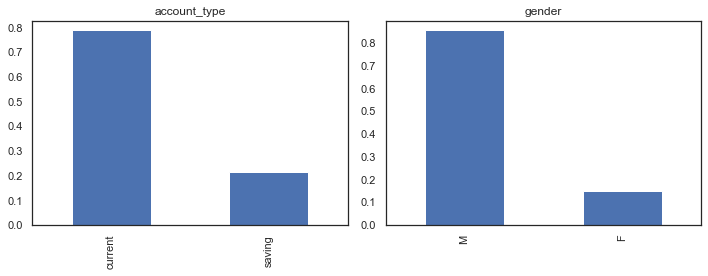

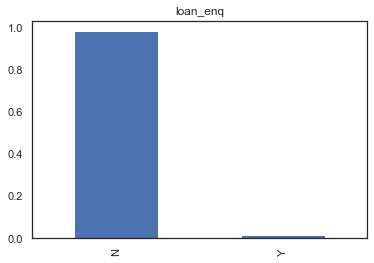

In [61]:
def plot_categorical_columns(dataframe):
    categorical_columns = dataframe.select_dtypes(include=['object']).columns
    
    for i in range(0,len(categorical_columns),2):
            if len(categorical_columns) > i+1:
                
                plt.figure(figsize=(10,4))
                plt.subplot(121)
                dataframe[categorical_columns[i]].value_counts(normalize=True).plot(kind='bar')
                plt.title(categorical_columns[i])
                plt.subplot(122)     
                dataframe[categorical_columns[i+1]].value_counts(normalize=True).plot(kind='bar')
                plt.title(categorical_columns[i+1])
                plt.tight_layout()
                plt.show()

            else:
                dataframe[categorical_columns[i]].value_counts(normalize=True).plot(kind='bar')
                plt.title(categorical_columns[i])
        
           
plot = plot_categorical_columns(df)

* Most of the customers are having current account
* Majority of the customers are male
* Majority of the customer did not enquire for loan


## Transaction count of debit card and credit card

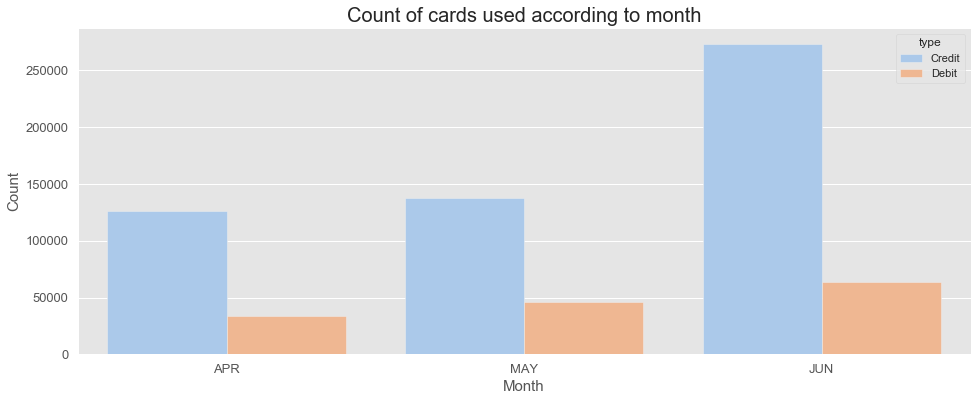

In [46]:
#creating  dataframe for debit card count and credit card count
count_df = df[['cc_count_apr', 'cc_count_may', 'cc_count_jun', 'dc_count_apr', 'dc_count_may', 'dc_count_jun']].sum().reset_index().rename(columns={0:'count'})
count_df['month_name'] = count_df['index'].apply(lambda x: x.split('_')[2]).str.upper()
count_df['type'] = 'Debit'
count_df.loc[0:2,'type'] = 'Credit'

plt.figure(figsize=(16,6))
ax = sns.barplot(x='month_name', y='count', data=count_df, hue='type', palette='pastel')
ax.set_title('Count of cards used according to month', fontsize=20);
ax.set_xlabel('Month', fontsize=15);
ax.set_ylabel('Count', fontsize=15);
count_df;

* After observing the above count we can make out that cmb bank customers are using credit card more than debit card.
* one can also observe that for both debit and credit card the number of transaction is increasing for each month.
* It also seems like people are happy with credit card of cmb bank because they might be getting more rewards like cashbacks and discount for transaction made with credit card  
* The usage of debit card is less it might be possible that people might be having less savings in their bank account

## Total number of times amount debited or credited from account

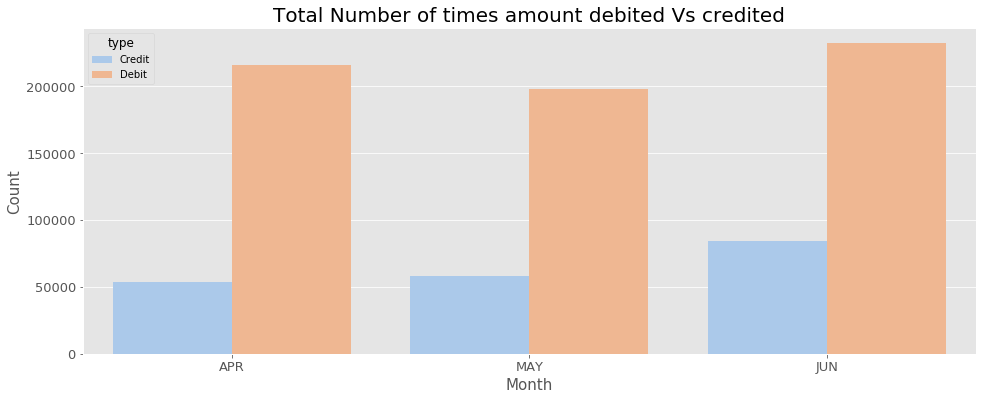

In [21]:
#creating dataframe for debit card count and credit card count
count_df = df[['credit_count_apr', 'credit_count_may', 'credit_count_jun', 'debit_count_apr', 'debit_count_may', 'debit_count_jun']].sum().reset_index().rename(columns={0:'count'})
count_df['month_name'] = count_df['index'].apply(lambda x: x.split('_')[2]).str.upper()
count_df['type'] = 'Debit'
count_df.loc[0:2,'type'] = 'Credit'

plt.figure(figsize=(16,6))
ax = sns.barplot(x='month_name', y='count', data=count_df, hue='type', palette='pastel')
ax.set_title('Total Number of times amount debited Vs credited', fontsize=20);
ax.set_xlabel('Month', fontsize=15);
ax.set_ylabel('Count', fontsize=15);
count_df;

- from the above plot we can see that outgoing transactions are more than icoming transactions
- customers are spending more 

## Correlation Visualisation

,ID,age,region_code,dc_cons_apr,dc_cons_may,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,cc_cons
ID,1.00,-0.00,-0.01,0.01,0.01,0.00,0.00,0.00,-0.00,-0.00,0.01,0.01,0.00,nan,nan,nan,nan,0.01,0.02,0.09,-0.07,-0.00,-0.01,0.00,-0.01,-0.00,-0.01,0.01,0.01,0.00,0.01,-0.00,0.00,-0.01,0.00,0.01,-0.00
age,-0.00,1.00,-0.03,-0.08,-0.13,-0.10,0.02,0.02,0.01,-0.12,-0.18,-0.16,0.38,nan,nan,nan,nan,0.00,0.09,0.22,0.25,0.12,0.15,-0.13,-0.07,0.16,-0.02,-0.02,-0.10,-0.16,0.02,-0.03,0.00,-0.12,-0.15,0.01,0.02
region_code,-0.01,-0.03,1.00,0.04,0.04,0.04,0.01,-0.00,0.01,0.05,0.07,0.05,-0.01,nan,nan,nan,nan,-0.01,0.01,-0.00,-0.00,-0.00,-0.01,0.06,0.04,-0.02,-0.00,-0.00,0.05,0.09,-0.01,0.02,0.02,0.04,0.07,-0.01,-0.00
dc_cons_apr,0.01,-0.08,0.04,1.00,0.21,0.25,-0.01,-0.01,-0.01,0.47,0.32,0.33,-0.03,nan,nan,nan,nan,0.02,-0.01,-0.02,-0.03,0.02,0.03,0.27,0.15,0.00,0.03,0.06,0.17,0.31,0.00,0.05,0.04,0.15,0.30,-0.00,-0.01
dc_cons_may,0.01,-0.13,0.04,0.21,1.00,0.29,-0.01,-0.00,0.00,0.26,0.41,0.34,-0.06,nan,nan,nan,nan,-0.02,-0.03,-0.02,0.03,0.03,0.04,0.33,0.19,0.01,0.05,0.09,0.23,0.39,0.01,0.06,0.05,0.20,0.37,0.01,-0.02


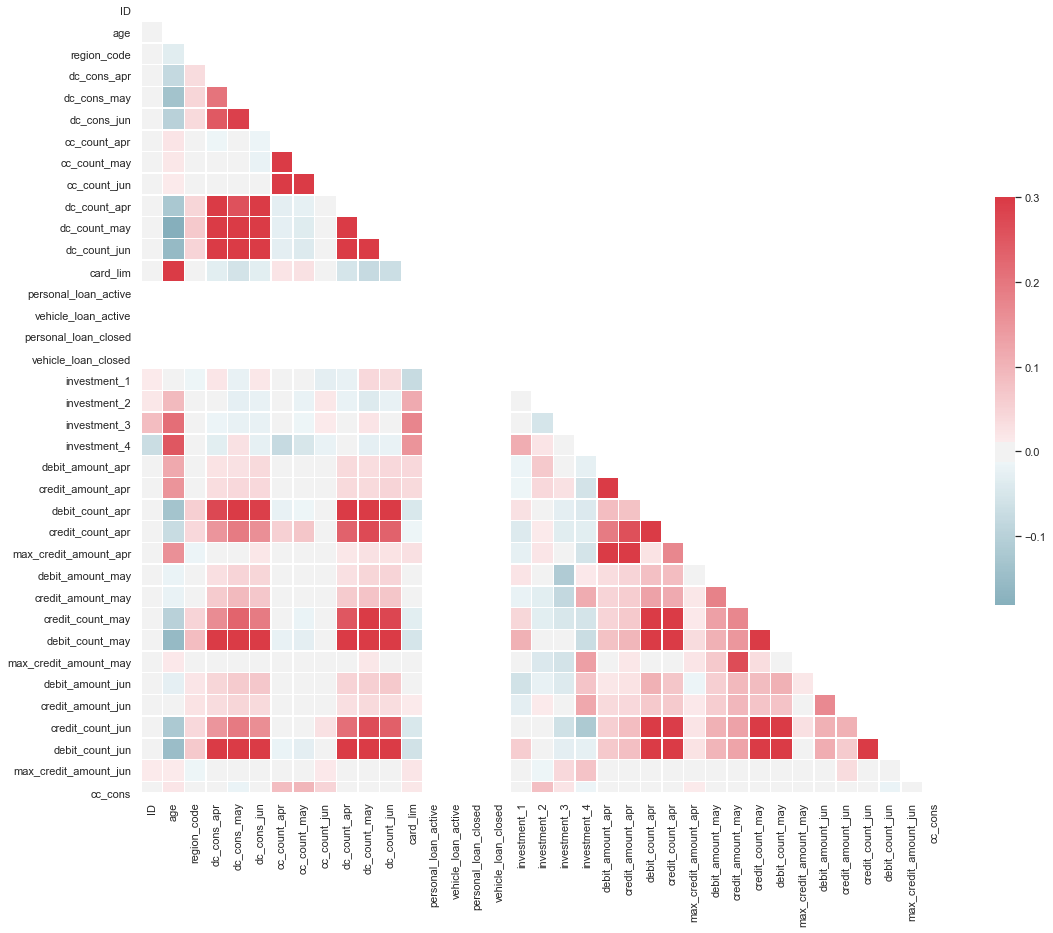

In [47]:
## Correlation Matrix
sns.set(style="white")
# Compute the correlation matrix
corr = df.corr()
corr.head()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Type of bank account customer uses

Text(0.5, 0.98, 'Count of Age groups based on Account type and Gender')

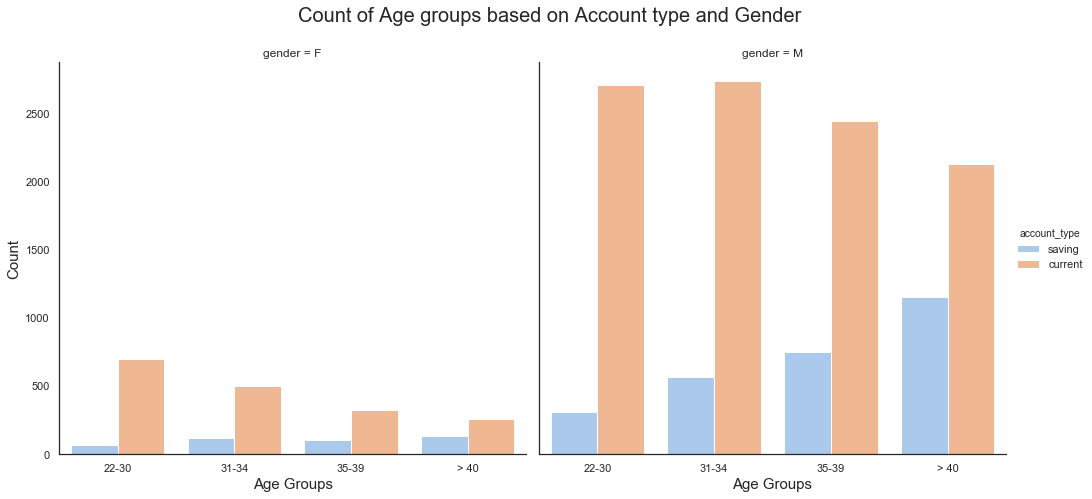

In [49]:
#Type of bank account customer uses
ax = sns.catplot(x="age_group", col='gender',hue='account_type',data=df, kind="count", height=7, palette='pastel');
ax.fig.subplots_adjust(top=0.87)
ax.fig.suptitle('Count of Age groups based on Account type and Gender', fontsize=20);
ax.set_xlabels('Age Groups', fontsize=15);
ax.set_ylabels('Count', fontsize=15)

## Gender wise debit card spent for next 3 months

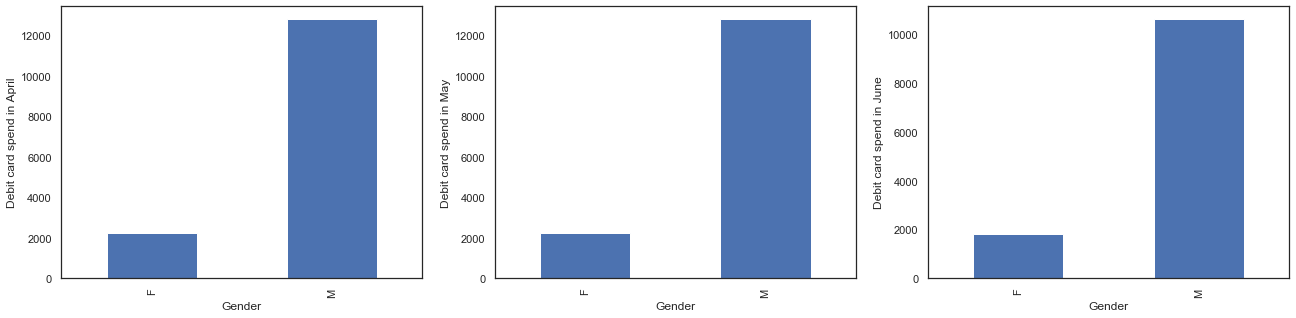

In [50]:
#Gender wise debit card spend for 3 months
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(22,5))
gb = df.groupby(['gender'])
gb['dc_cons_apr'].count().plot(kind='bar',ax=ax1)
gb['dc_cons_may'].count().plot(kind='bar',ax=ax2)
gb['dc_cons_jun'].count().plot(kind='bar',ax=ax3)
ax1.set_xlabel('Gender')
ax1.set_ylabel('Debit card spend in April')
ax2.set_xlabel('Gender')
ax2.set_ylabel('Debit card spend in May')
ax3.set_xlabel('Gender')
ax3.set_ylabel('Debit card spend in June');
# plt.tightlayout()

## Account type wise debit card spend

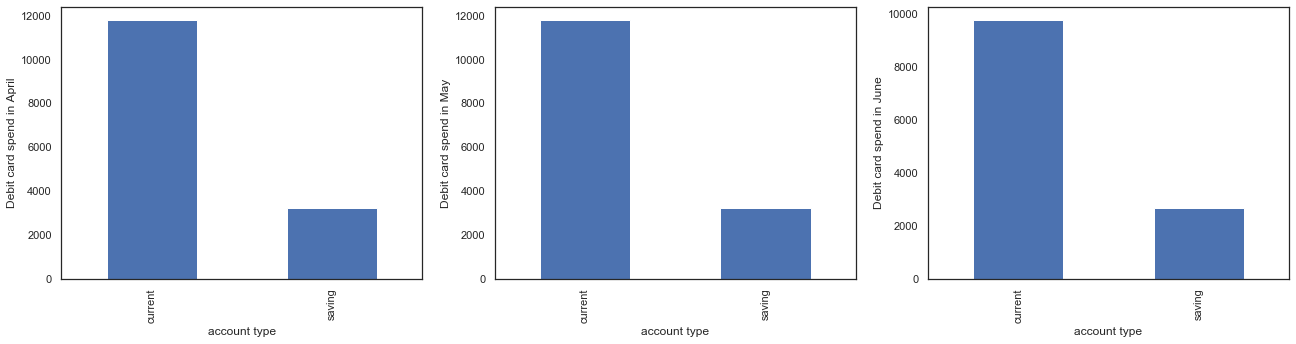

In [51]:
#Account type wise debit card spend 
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(22,5))
gb = df.groupby(['account_type'])
gb['dc_cons_apr'].count().plot(kind='bar',ax=ax1)
gb['dc_cons_may'].count().plot(kind='bar',ax=ax2)
gb['dc_cons_jun'].count().plot(kind='bar',ax=ax3)
ax1.set_xlabel('account type')
ax1.set_ylabel('Debit card spend in April')
ax2.set_xlabel('account type')
ax2.set_ylabel('Debit card spend in May')
ax3.set_xlabel('account type')
ax3.set_ylabel('Debit card spend in June');
#plt.tightlayout()

## Personal Loan Active with other bank

In [ ]:
#Personal loan active with other banks
ax = sns.catplot(x="age_group", col='gender',hue='personal_loan_active',data=test_df, kind="count", height=7, palette='pastel');
ax.fig.subplots_adjust(top=0.87)
ax.fig.suptitle('Count of personal loan active based on Gender and age group', fontsize=20);
ax.set_xlabels('Age Groups', fontsize=15);
ax.set_ylabels('Count', fontsize=15);

## Vehicle Loan Active with other bank

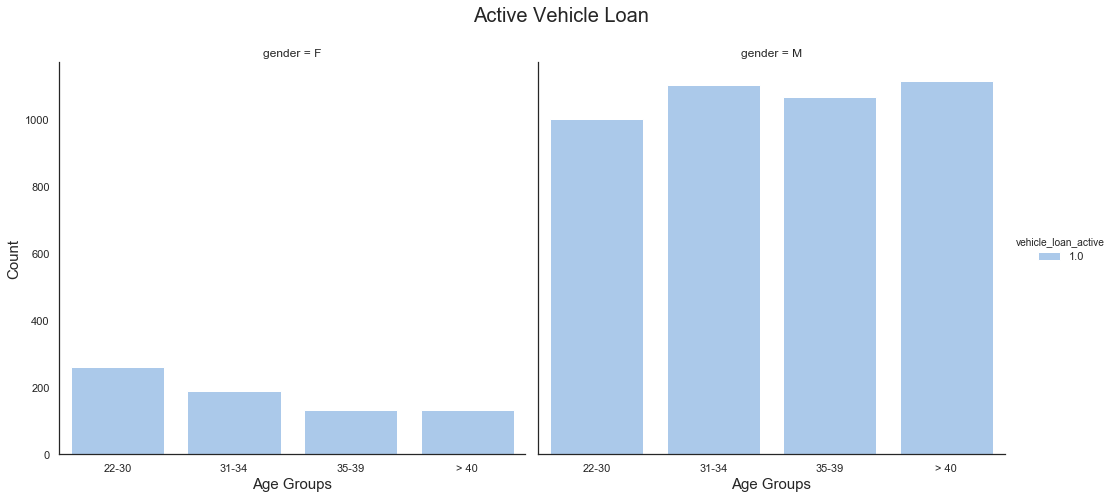

In [60]:
#Vehicle loan active with other banks
ax=sns.catplot(x="age_group", col='gender',hue='vehicle_loan_active',data=test_df, kind="count", height=7, palette='pastel');
ax.fig.subplots_adjust(top=0.87)
ax.fig.suptitle('Active Vehicle Loan', fontsize=20);
ax.set_xlabels('Age Groups', fontsize=15);
ax.set_ylabels('Count', fontsize=15);